<a href="https://colab.research.google.com/github/kritchaya2310/project_estimation_pore_pressure/blob/main/estimation_of_pore_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
well1= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 1.csv')
well2= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 2.csv')
well3= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 3.csv')
well4= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 4.csv')
well5= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 5.csv')
well6= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 6.csv')
well7= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 7.csv')
well8= pd.read_csv('/content/drive/MyDrive/Train projects/Estimation of Pore Pressure using Machine Learning /well 8.csv')

In [4]:
df= pd.concat([well1,well2,well3,well4,well5,well6,well7,well8])

In [5]:
df.shape

(11494, 10)

In [6]:
df

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,3.127835e+05,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,3.149500e+05,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,3.171165e+05,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,3.192830e+05,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,3.214495e+05,1609.0
...,...,...,...,...,...,...,...,...,...,...
1038,181.3026,105.3357,1.8353,1.4914,0.898063,9.9461,51.5604,1.1152,3.260898e+06,1805.0
1039,181.4550,103.8500,1.8245,1.4815,0.876908,9.9117,54.9033,1.1240,3.244434e+06,1805.0
1040,181.6074,103.2400,1.8128,1.4755,0.868221,9.8249,52.2509,1.1346,3.226335e+06,1803.0
1041,181.7598,102.9838,1.7950,1.4691,0.864573,9.8545,53.2176,1.1472,3.197337e+06,1808.0


In [7]:
df.isnull().sum()

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
Stress         0
PP             0
dtype: int64

In [8]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP'],
      dtype='object')

In [9]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP','Stress']

#Data analysis

In [ ]:
for col in cols :
    plt.figure()
    sns.boxplot(df[col])

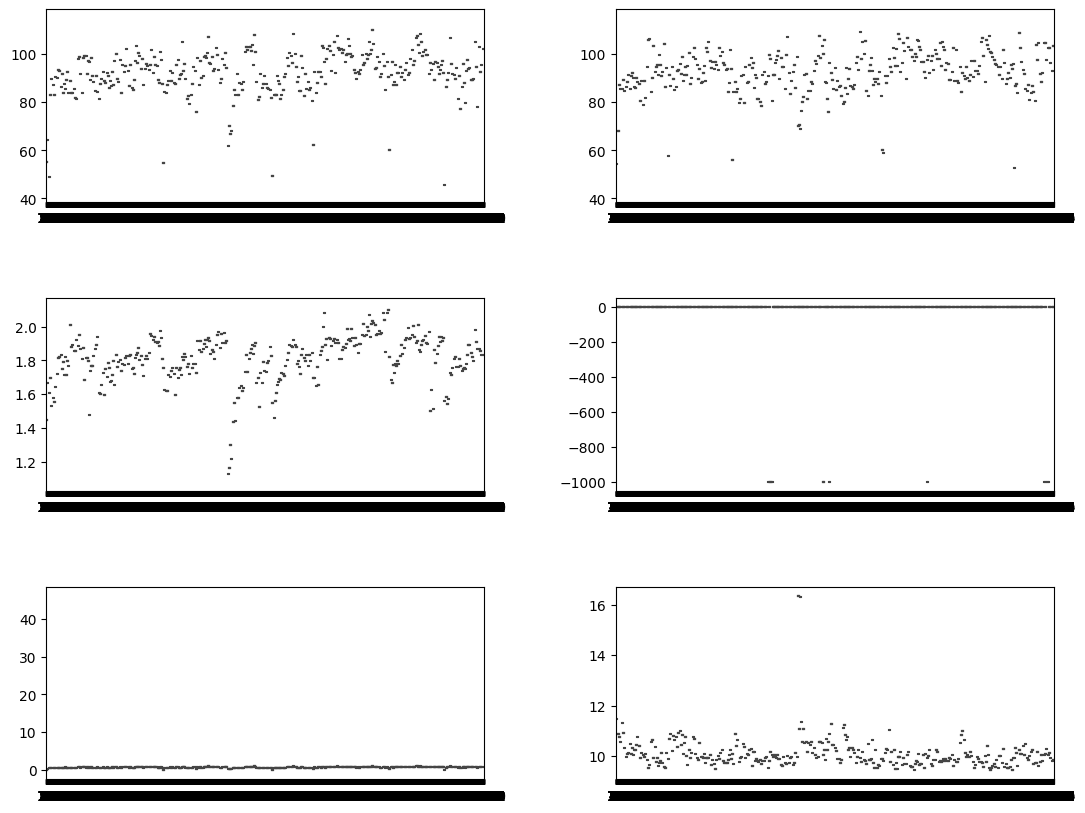

In [11]:
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(df['GR'])
#plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(df['GR'])
#plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(df['RHOB'])
#plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(df['Vp'])
#plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(df['Vsh'])
#plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(df['Caliper'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [12]:
# GR

df['GR'][df['GR']<70]= np.nan
# RHOB
df['RHOB'][df['RHOB']<1.5] = np.nan
# Vp
df['Vp'][df['Vp']>1.70] = np.nan
# Vsh
df['Vsh'][df['Vsh']<0.37] = np.nan
# Caliper
df['Caliper'][df['Caliper']>11]= np.nan
# Porosity
df['Porosity'][df['Porosity']>75]= np.nan
# Resistivity
df['Resistivity'][df['Resistivity']>1.5]= np.nan

In [13]:
df= df.dropna()

In [14]:
#Shape of train data after outlier removal
print('Train size: ',df.shape)

Train size:  (10408, 10)


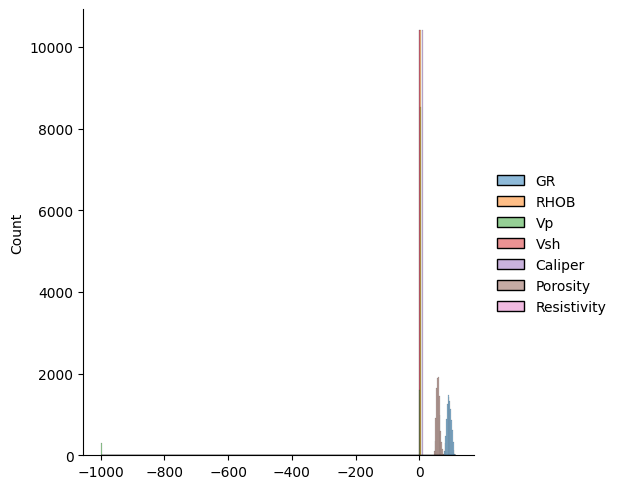

In [15]:
sns.displot(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']])

That hard to analysis, Max and Min values is better

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scale= MinMaxScaler()

In [21]:
cols= ['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']
scaled= scale.fit_transform(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']])

In [20]:
scaled_df= pd.DataFrame(scaled,columns= cols)

In [22]:
df= df.reset_index()

In [23]:
scaled_df

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...
10403,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [24]:
merge= [df['DEPTH'],df['PP'],scaled_df]
pd.concat(merge,axis=1)

,DEPTH,PP,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [25]:
df_scaled= pd.concat(merge,axis=1)

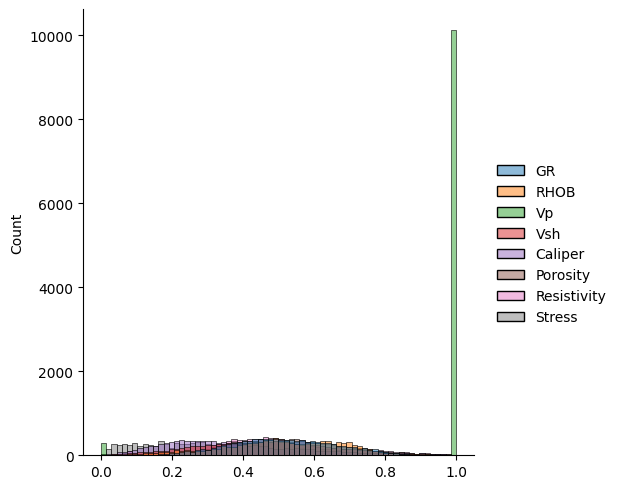

In [26]:
sns.displot(df_scaled[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']])

Model development

<Figure size 640x480 with 0 Axes>

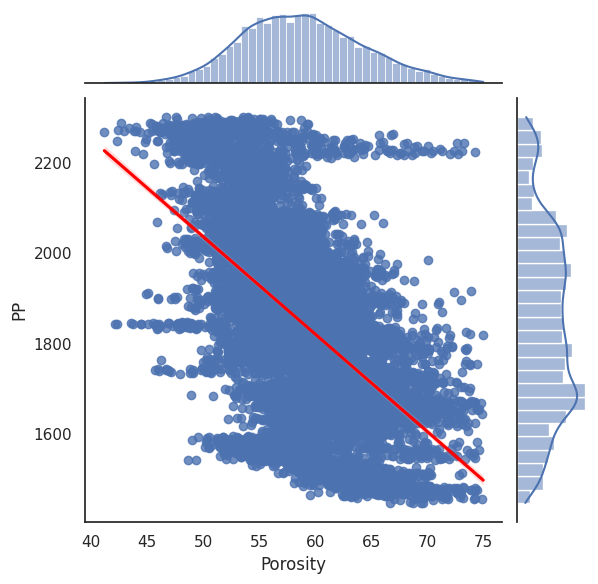

In [27]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Porosity'], y = df['PP'], kind='reg', line_kws={"color": "red"})

<Figure size 640x480 with 0 Axes>

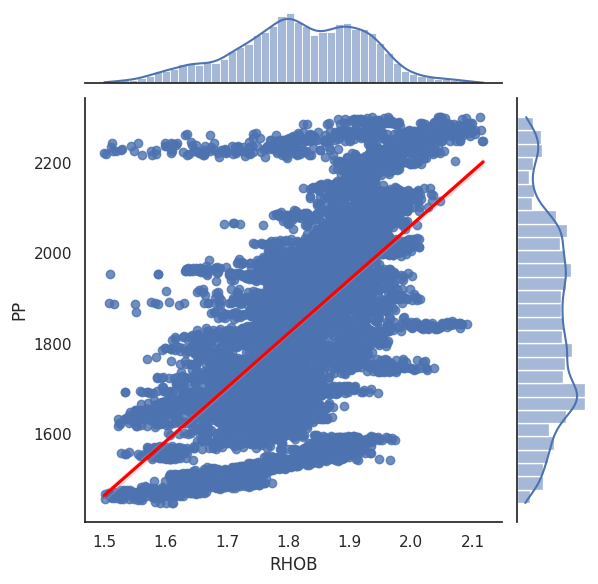

In [28]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['RHOB'], y = df['PP'], kind='reg', line_kws={"color": "red"})

In [29]:
df= df_scaled.drop(['Vp'],axis=1)
df

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.741773,0.277238,0.356041,0.671132,0.428971


In [30]:
df.corr()

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
DEPTH,1.000000,0.709591,0.228171,0.596943,0.183359,-0.470626,-0.529550,0.512857,0.995396
PP,0.709591,1.000000,0.297317,0.618000,0.327807,-0.467341,-0.562232,0.654209,0.725342
GR,0.228171,0.297317,1.000000,0.448181,0.928665,-0.216557,-0.427141,0.200921,0.249181
RHOB,0.596943,0.618000,0.448181,1.000000,0.447860,-0.482734,-0.870870,0.442243,0.653090
Vsh,0.183359,0.327807,0.928665,0.447860,1.000000,-0.237762,-0.435956,0.237863,0.206708
Caliper,-0.470626,-0.467341,-0.216557,-0.482734,-0.237762,1.000000,0.375908,-0.416026,-0.470615
Porosity,-0.529550,-0.562232,-0.427141,-0.870870,-0.435956,0.375908,1.000000,-0.407968,-0.578736
Resistivity,0.512857,0.654209,0.200921,0.442243,0.237863,-0.416026,-0.407968,1.000000,0.522337
Stress,0.995396,0.725342,0.249181,0.653090,0.206708,-0.470615,-0.578736,0.522337,1.000000


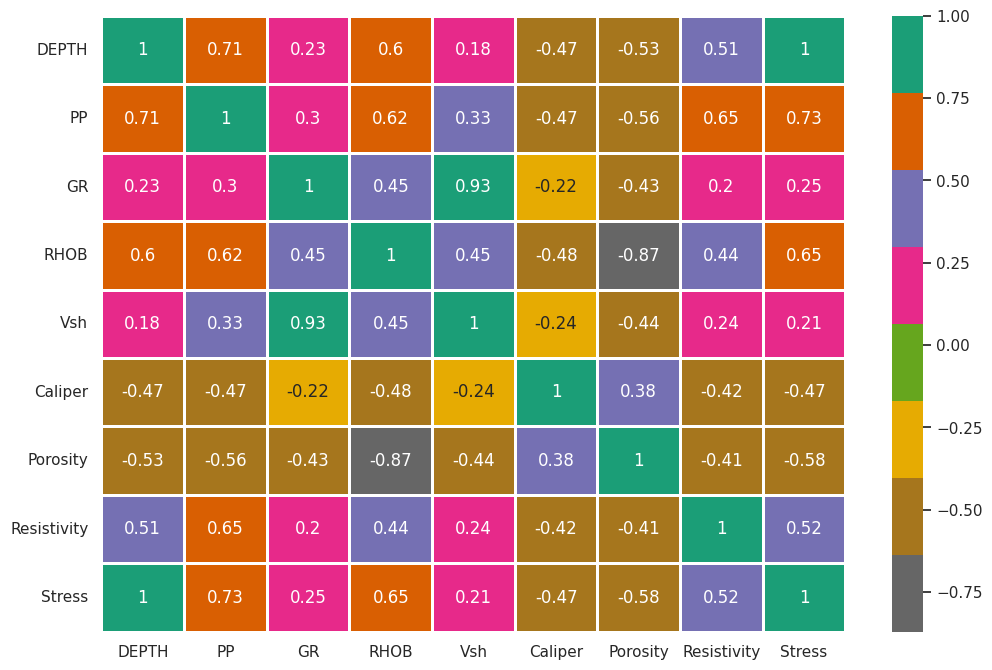

In [31]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Splitting data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x= df.drop(['PP','DEPTH'],axis=1) ##independent var
y= df['PP'] ## dependent var
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [34]:
print("Training size:",x_train.shape)
print("Testing size:",x_test.shape)

Training size: (8326, 7)
Testing size: (2082, 7)


#1) Regression Models

##Multiple Linear Regression

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression(fit_intercept=True)
model.fit(x_train_scaled, y_train)
pred = model.predict(x_test_scaled)

train_score = model.score(x_train_scaled, y_train)
print(f'Train score of trained model:   {train_score*100}')

test_score = model.score(x_test_scaled, y_test)
print(f'Test score of trained model:   {test_score*100}')


Train score of trained model:   66.45814272114728
Test score of trained model:   66.76129338187422


In [39]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-45.04308112  21.500122    59.7218312   -8.24533244  -7.54024676
  64.89512703  94.00065314]
Linear Model Coefficient (b):  1845.1494677276003


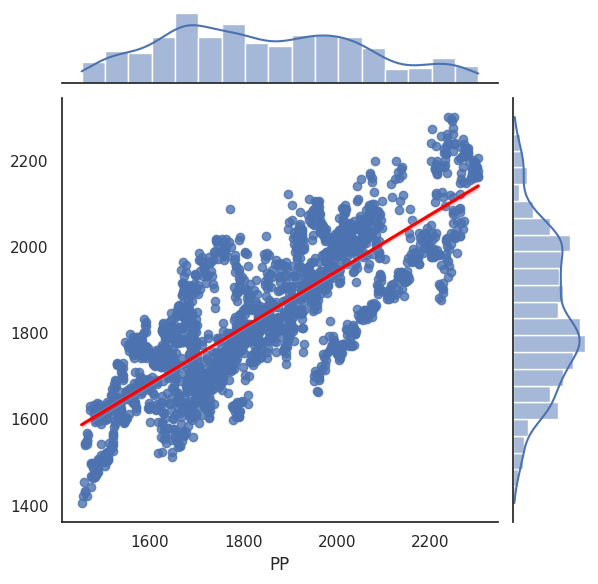

In [40]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

## Plot for observing the predicted and actual values

In [41]:
#Evaluation for Simple Multiple Linear Regression model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,14416.857029
1,RMSE,120.070217
2,MAE,93.101311
3,MAPE,5.086101
4,r2,0.667613
5,adj_r2,0.666491


##Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ridge = Ridge(alpha=0.001, fit_intercept=True)
ridge.fit(x_train_scaled, y_train)

pred = ridge.predict(x_test_scaled)

train_score = ridge.score(x_train_scaled, y_train)
print(f'Train score of trained model:   {train_score*100}')

test_score = ridge.score(x_test_scaled, y_test)
print(f'Test score of trained model:   {test_score*100}')


Train score of trained model:   66.45814272114374
Test score of trained model:   66.76129302097628


In [45]:
k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2_ridge = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_ridge) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2_ridge, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,14416.857186
1,RMSE,120.070218
2,MAE,93.101306
3,r2,0.667613
4,adj_r2,0.666491


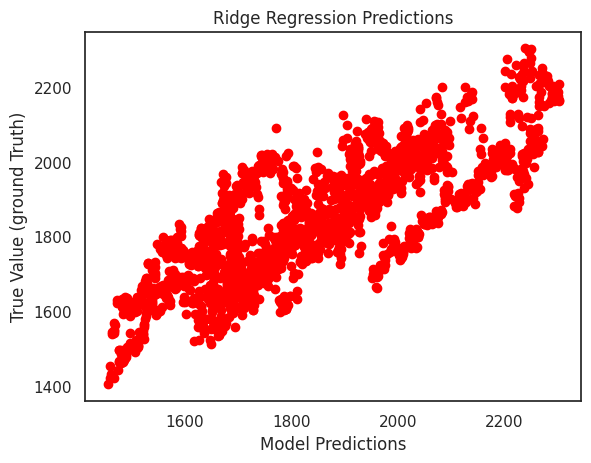

In [52]:
plt.plot(y_test, pred, "o", color = 'red')


plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

## 2) Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
pred=reg.predict(x_test)

In [58]:
rf_acc=r2_score(y_test, pred)
print("R^2:  ",rf_acc)
print("Adusted R^2:  ", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:  ", mean_absolute_error(y_test, pred))
print("MSE:  ", mean_squared_error(y_test, pred))
print("RMSE:  ",np.sqrt(mean_squared_error(y_test, pred)))

R^2:   0.9507433551556554
Adusted R^2:   0.9505771080419089
MAE:   25.547183933237264
MSE:   2136.442956724763
RMSE:   46.22167193779086


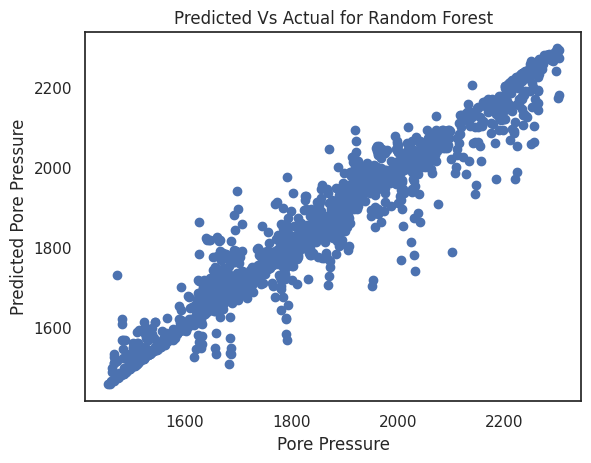

In [56]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

## 3) XGB Regressor

In [61]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
pred=xreg.predict(x_test)

In [64]:
xgb_acc=r2_score(y_test, pred)
print("R^2:    ",rf_acc)
print("Adusted R^2:    ", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:    ", mean_absolute_error(y_test, pred))
print("MSE:    ", mean_squared_error(y_test, pred))
print("RMSE:    ",np.sqrt(mean_squared_error(y_test, pred)))

R^2:     0.9507433551556554
Adusted R^2:     0.9328824068780123
MAE:     36.76111446072362
MSE:     2901.3459839497295
RMSE:     53.86414376883503


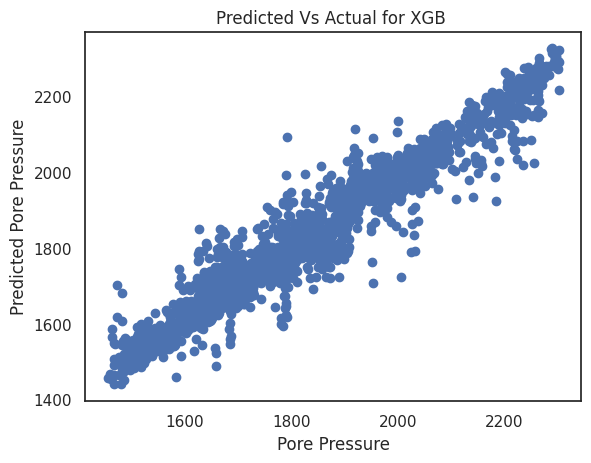

In [65]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for XGB ")
plt.show()

## 4) SVM Regressor

In [66]:
from sklearn import svm

regg=svm.SVR()

regg.fit(x_train,y_train)

SVR()

In [67]:
pred=regg.predict(x_test)

In [68]:
regg_acc=r2_score(y_test, pred)
print("R^2:   ",regg_acc)
print("Adusted R^2:   ", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:   ", mean_absolute_error(y_test, pred))
print("MSE:   ", mean_squared_error(y_test, pred))
print("RMSE:   ",np.sqrt(mean_squared_error(y_test, pred)))

R^2:    0.6612173963568495
Adusted R^2:    0.6600739642326923
MAE:    92.75511959855794
MSE:    14694.255154843097
RMSE:    121.2198628725635


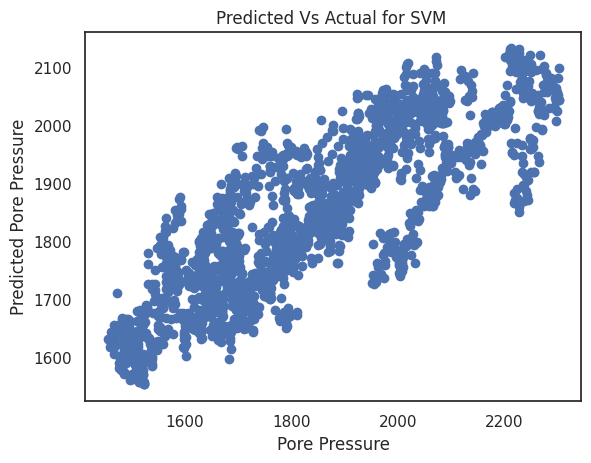

In [69]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()

## 5) ANN

In [ ]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error')

feature_cols = x_train
labels = y_train.values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

In [71]:
pred= model.predict(x_test)

66/66 [==============================] - 0s 998us/step


In [72]:
ann_acc=r2_score(y_test, pred)
print("R^2",ann_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.792858467127931
Adusted R^2 0.7921593394856434
MAE 75.31081620033697
MSE 8984.494789447968
RMSE 94.7865749431214


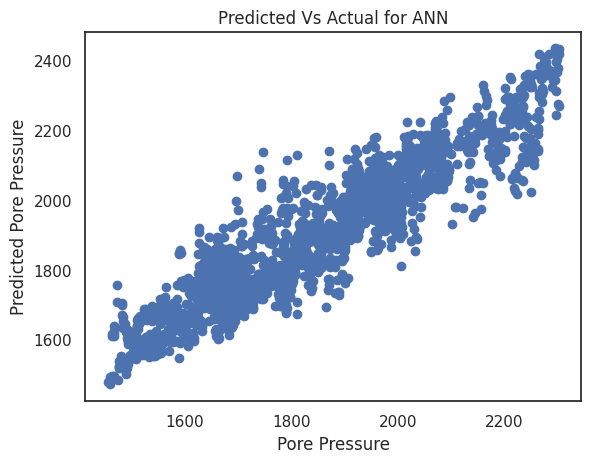

In [73]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for ANN")
plt.show()

In [74]:
models=pd.DataFrame({
    'Model':['Linear Regression','Ridge Regression', 'Random Forest', 'XGBoost', 'Support Vector Machine', 'ANN'],
    'R_squared Score':[r2_linreg*100,r2_ridge*100, rf_acc*100, xgb_acc*100, regg_acc*100, ann_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)


,Model,R_squared Score
2,Random Forest,95.074336
3,XGBoost,93.310817
5,ANN,79.285847
0,Linear Regression,66.761293
1,Ridge Regression,66.761293
4,Support Vector Machine,66.121740


## Hypertuning top 3 performing models

### 1) Random Forest Regressor

In [75]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)

In [77]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:  \n')
pprint(rf.get_params())

Parameters currently in use:  

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Defining the parameters

In [78]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [79]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train,y_train)

In [80]:
rf_tuned= RandomForestRegressor(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=100,
 bootstrap= True)

In [81]:
y_train

2124    1897.000
394     1722.000
3101    1713.000
1737    1785.000
561     1770.000
          ...   
5734    1529.500
5191    1645.494
5390    1690.500
860     1854.000
7270    1999.000
Name: PP, Length: 8326, dtype: float64

In [82]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=800)

In [83]:
pred_tunedrf= rf_tuned.predict(x_test)

In [84]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2:   ",rftuned_acc)
print("Adusted R^2:   ", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:   ", mean_absolute_error(y_test, pred_tunedrf))
print("MSE:   ", mean_squared_error(y_test, pred_tunedrf))
print("RMSE:   ",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2:    0.9517254099666999
Adusted R^2:    0.9515624774063175
MAE:    25.258513078530406
MSE:    2093.8476055634396
RMSE:    45.75857958419863


In [90]:
depth= np.linspace(30,300,len(x_test))

x_testplot= x_test.copy()

x_testplot['Depth']= depth

x_testplot['Acutal PP']= y_test

x_testplot['Predicted PP']= pred_tunedrf


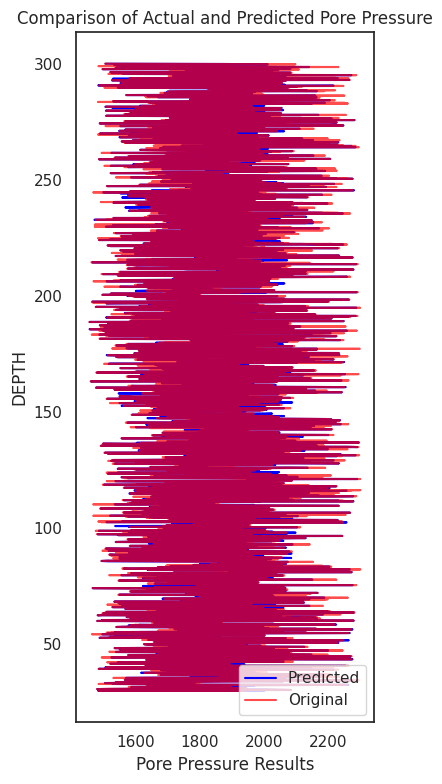

In [91]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

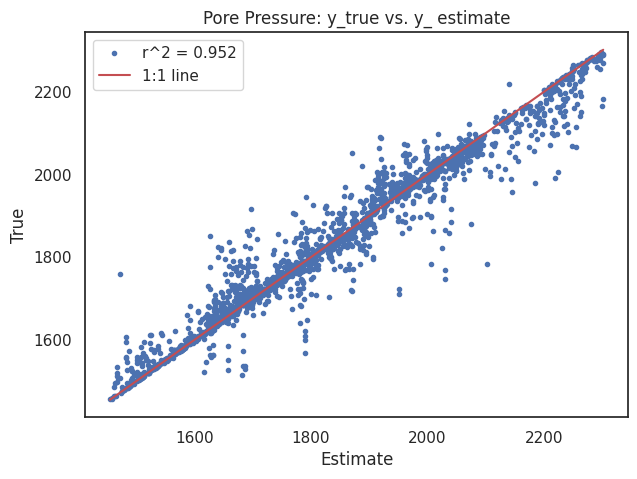

In [92]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedrf, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedrf)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [138]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=6, shuffle=True, random_state=1)

# Define and tune the random forest regression model
rf_tuned = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5)

predictions = []
scores=[]
for train_idx, test_idx in kf.split(x_train):
    # Get the training and test data for the current fold
    train_predictors = x_train.iloc[train_idx]
    train_target = y_train.iloc[train_idx]
    test_predictors = x_train.iloc[test_idx]
    test_target = y_train.iloc[test_idx]
    
    # Train the model on the training data for the current fold
    rf_tuned.fit(train_predictors, train_target)
    
    # Make predictions on the test data for the current fold
    test_predictions = rf_tuned.predict(test_predictors)
    predictions.append(test_predictions)
    
    # Compute the cross-validation score for the current fold
    score = np.mean(cross_val_score(rf_tuned, train_predictors, train_target, cv=10))
    scores.append(score)

print(f'Average cross-validation score: {np.mean(scores)}')
print(f'Cross-validation scores for each fold: {scores}')


Average cross-validation score: 0.9223165397472769
Cross-validation scores for each fold: [0.9216428496414458, 0.9228193161990864, 0.9228220307490101, 0.9230895112653206, 0.9221689905778471, 0.9213565400509511]


In [139]:
fr_val_score= val_score

In [140]:
rf_score_df= pd.DataFrame(fr_val_score)
rf_score_df= rf_score_df.reset_index()
rf_score_df

,index,0
0,0,0.925430
1,1,0.925664
2,2,0.936282
3,3,0.934732
4,4,0.929413
5,5,0.936260
6,6,0.930757
7,7,0.940896
8,8,0.940888
9,9,0.946196


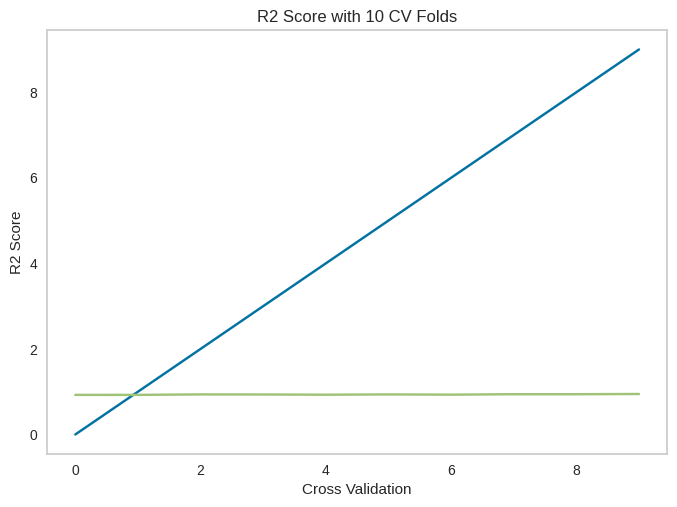

In [141]:
plt.plot(rf_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

### 2) XG Boost Regressor

In [98]:
xgbr=XGBRegressor()

In [99]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [100]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [101]:
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [102]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [103]:
clf.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7999999999999999}

In [104]:
xgb_tuned= XGBRegressor(subsample= 0.7,
 n_estimators=500,
max_depth=15,
 learning_rate= 0.1,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel= 0.6)

In [105]:
xgb_tuned.fit(x_train,y_train)

pred_tunedxgb= xgb_tuned.predict(x_test)

In [107]:
xgbtuned_acc=r2_score(y_test, pred_tunedxgb)
print("R^2:   ",xgbtuned_acc)
print("Adusted R^2:   ", 1-(1-r2_score(y_test, pred_tunedxgb))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:   ", mean_absolute_error(y_test, pred_tunedxgb))
print("MSE:   ", mean_squared_error(y_test, pred_tunedxgb))
print("RMSE:   ",np.sqrt(mean_squared_error(y_test, pred_tunedxgb)))

R^2:    0.9397211390247839
Adusted R^2:    0.9395176906029775
MAE:    34.17490517503077
MSE:    2614.5172570493833
RMSE:    51.13235039629396


In [108]:
x_testplot['Predicted PP xgb']= pred_tunedxgb

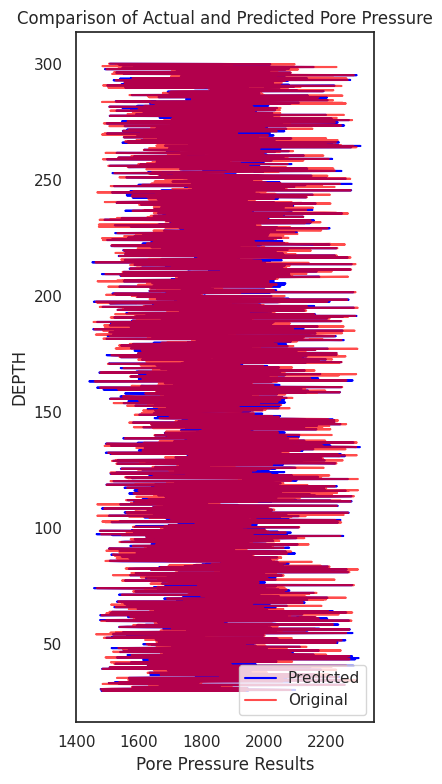

In [109]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP xgb"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

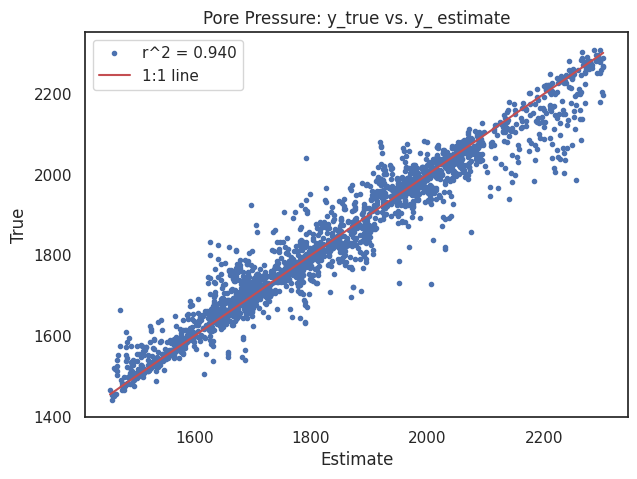

In [110]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedxgb, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedxgb)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=1)

predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    xgb_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = xgb_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(xgb_tuned, x_train, y_train , cv=10))
    val_score= cross_val_score(xgb_tuned, x_train, y_train , cv=10)
    
print(score)
print(val_score)


0.9346517178263445
[0.92542966 0.92566364 0.93628223 0.93473181 0.92941255 0.93625953
 0.93075736 0.94089611 0.94088793 0.94619637]


In [134]:
xgb_score_df= pd.DataFrame(val_score)
xgb_score_df = xgb_score_df.reset_index()

xgb_score_df

,index,0
0,0,0.925430
1,1,0.925664
2,2,0.936282
3,3,0.934732
4,4,0.929413
5,5,0.936260
6,6,0.930757
7,7,0.940896
8,8,0.940888
9,9,0.946196


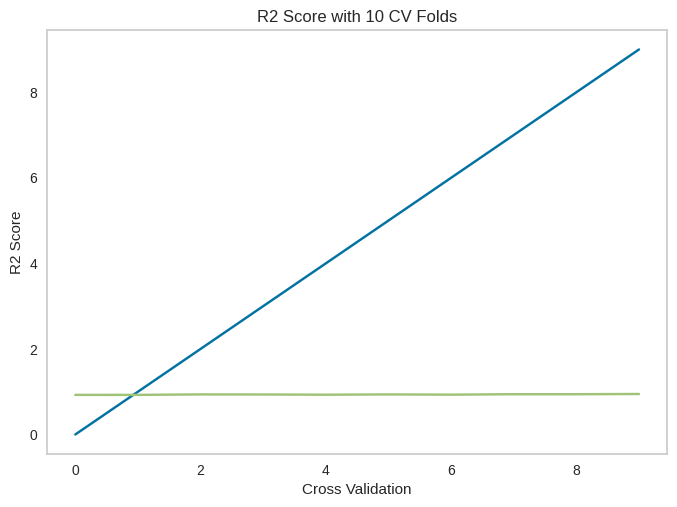

In [135]:
plt.plot(xgb_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

In [ ]:
!pip install bayesian-optimization

### 3) Using PyCaret

In [ ]:
!pip install pycaret
from pycaret.regression import *

In [114]:
df

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.741773,0.277238,0.356041,0.671132,0.428971


In [115]:
df=  df.drop(['DEPTH'],axis=1)

In [119]:
model= setup(data= df, target= 'PP',normalize= True,remove_outliers=True,profile=True)

,Description,Value
0,Session id,3204
1,Target,PP
2,Target type,Regression
3,Original data shape,"(10408, 8)"
4,Transformed data shape,"(10043, 8)"
5,Transformed train set shape,"(6920, 8)"
6,Transformed test set shape,"(3123, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [120]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,27.9936,2161.0241,46.4590,0.9495,0.0251,0.0152,1.1740
rf,Random Forest Regressor,29.0431,2625.6153,51.1994,0.9387,0.0276,0.0157,2.5540
xgboost,Extreme Gradient Boosting,40.1126,3281.0801,57.2470,0.9233,0.0311,0.0219,0.8460
lightgbm,Light Gradient Boosting Machine,39.8389,3371.6795,58.0238,0.9212,0.0317,0.0218,0.2820
knn,K Neighbors Regressor,41.6058,4820.9584,69.3766,0.8875,0.0377,0.0228,0.0580
dt,Decision Tree Regressor,29.1259,5347.3387,73.0291,0.8751,0.0394,0.0158,0.0720
gbr,Gradient Boosting Regressor,61.8466,6532.3161,80.7639,0.8476,0.0437,0.0337,1.1370
ada,AdaBoost Regressor,92.0368,11622.3980,107.7836,0.7286,0.0581,0.0503,0.4210
lar,Least Angle Regression,93.8360,14627.3980,120.8973,0.6586,0.0655,0.0514,0.0450
br,Bayesian Ridge,93.8009,14627.9752,120.8995,0.6586,0.0655,0.0514,0.0440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=3204)

In [121]:
et= create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.2407,2488.9325,49.8892,0.9393,0.0268,0.0158
1,28.4316,2198.3133,46.8862,0.9510,0.0252,0.0154
2,28.2723,2181.0260,46.7015,0.9525,0.0251,0.0152
3,26.7273,1888.0164,43.4513,0.9567,0.0231,0.0143
4,26.8413,2028.4541,45.0384,0.9544,0.0245,0.0146
5,28.1755,2099.0842,45.8158,0.9510,0.0249,0.0155
6,27.9085,2186.0898,46.7556,0.9468,0.0254,0.0152
7,29.0325,2242.4541,47.3546,0.9486,0.0249,0.0155
8,27.5373,2068.6392,45.4823,0.9486,0.0252,0.0152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [122]:
tuned_et= tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.2756,5098.3579,71.4028,0.8757,0.0382,0.0276
1,51.1080,5144.7265,71.7267,0.8853,0.0386,0.0277
2,50.4467,4889.0898,69.9220,0.8935,0.0373,0.0272
3,48.5465,4571.1650,67.6104,0.8952,0.0358,0.0261
4,49.9563,4819.2272,69.4207,0.8917,0.0376,0.0273
5,51.8711,5026.4114,70.8972,0.8827,0.0388,0.0287
6,48.2503,4429.4454,66.5541,0.8922,0.0360,0.0263
7,53.2860,5530.3950,74.3666,0.8732,0.0393,0.0286
8,48.0830,4387.8535,66.2409,0.8910,0.0362,0.0265


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


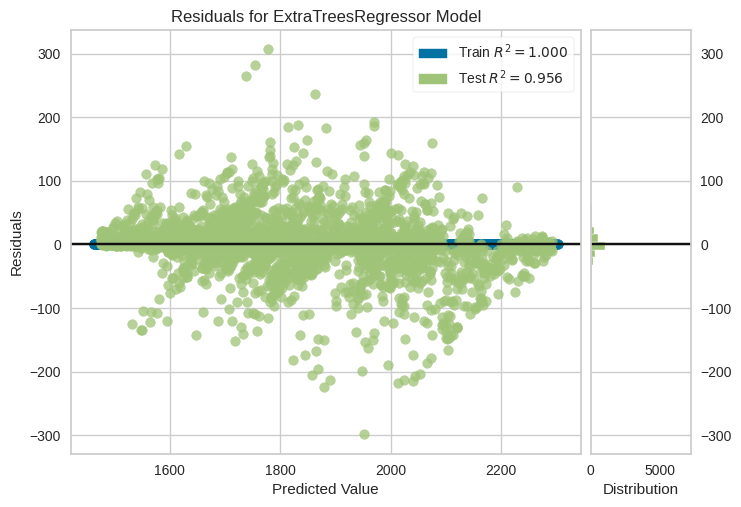

In [123]:
plot_model(tuned_et)

In [124]:
predictions= tuned_et.predict(x_test)

In [125]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [126]:
et_acc=r2_score(y_test, predictions)
print("R^2",et_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, predictions))
print("MSE", mean_squared_error(y_test, predictions))
print("RMSE",np.sqrt(mean_squared_error(y_test, predictions)))

R^2 -0.04638323579396486
Adusted R^2 -0.04991490534582477
MAE 173.49593697820512
MSE 45385.512984316825
RMSE 213.0387593474878


In [127]:
x_testplot['Predicted PP et']= predictions

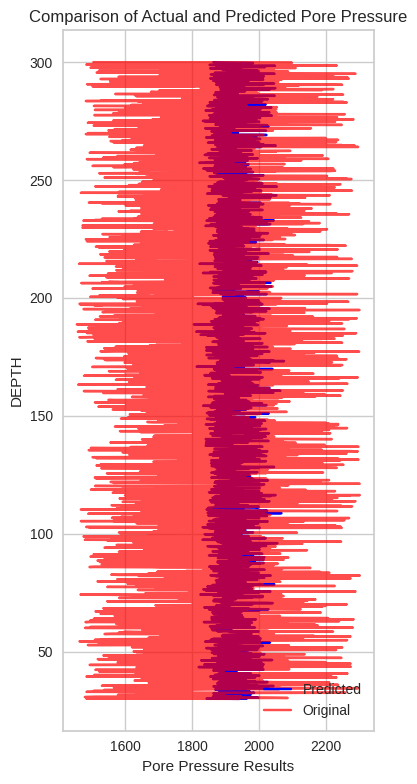

In [128]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP et"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

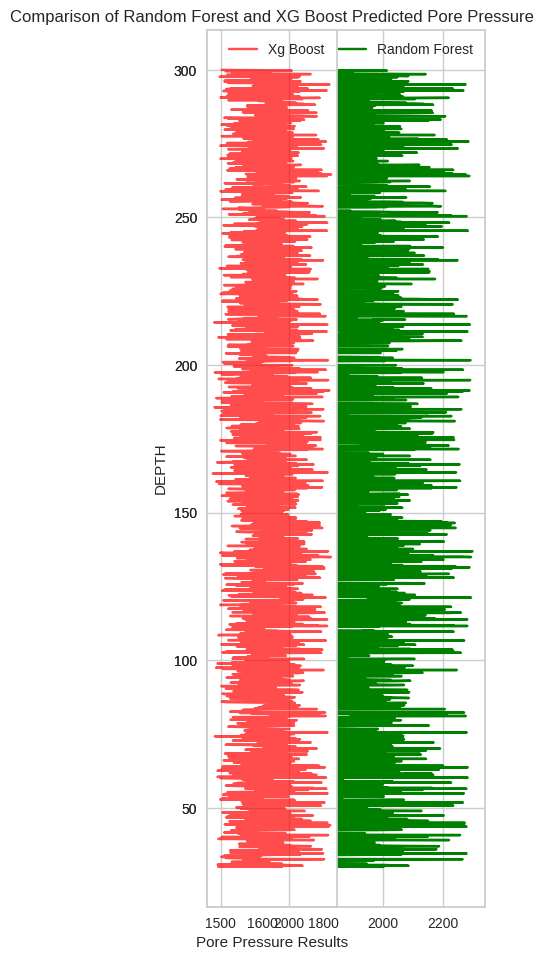

In [129]:
#Plotting results
fig = plt.figure(figsize=(4,10))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(121)
plt.title('Comparison of Random Forest and XG Boost Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP"], x_testplot["Depth"],  color = 'green', label='Random Forest')
ax2.plot(x_testplot["Predicted PP xgb"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Xg Boost')
ax1.legend()
ax2.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

Pore Pressure was predicted with 96% accuracy by the Random Forest Model and 94% accuracy by the XGB Regressor.

SVM underperformed in this dataset, with an accuracy of only 60–70%.

Additionally, effective stress was anticipated using ML algorithms and estimated from mathematical concepts with an accuracy of roughly 97%.
